# Group members
Adrián Correa Cruz - 74853939W\
Azul María García - NIE Y9889243Q\
Nuria María Haba Díaz - 79030458C\
José Luis Puente Bodoque - 79038387Z

# Lab assignment: perceptron training

In this assignment we will learn how perceptrons work and are trained.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>


During the assignment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **scikit-learn**

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells.

Let's go!

## The AND and OR problems

Let us define the AND and OR problems in the **dataset** form we will be using throughout this assignment. A dataset is composed of two matrices X and Y, storing respectively the **inputs** fed to the networks and the desired **outputs** or **targets** for such inputs. We will use numpy's arrays for this purpose:

In [1]:
import numpy as np
X_and = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
Y_and = np.array([[0], [0], [0], [1]])
X_or = X_and.copy()    # same inputs as for AND
Y_or = np.array([[0], [1], [1], [1]])
print(X_and)
print(Y_and)
print(X_or)
print(Y_or)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [0]
 [0]
 [1]]
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [1]]


**Comments**

Note that in the patterns above we have prepended a 1, so that the **weights** **w** also include the **bias** term b and a dot product of the form **w**·**x** actually computes **w**·**x** + b. Hence, in this particular case **w** = (b, w1, w2).

## Perceptrons

As you have seen in the theory, **perceptrons** are based on the **McCulloch-Pitts neuron**, which is a simplified version of a neuron in the human brain. The **activation function** of this neuron is 1 when its inputs are greater than or equal to 0, and 0 otherwise:

In [2]:
def step_activation(x):
    return 1*(x >= 0)   # multiply by 1 to change from boolean to int

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Figure out by yourself some values for <b>w</b> which solve the AND and OR problems. Store them in 2 variables called <b>w_and</b> and <b>w_or</b>.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
It may help if you print the points in (x1, x2) axes and interpret <b>w</b> and b as a hyperplane.
 </td></tr>
</table>

In [3]:
# Calculated values which solve AND and OR problems.
w_and = np.array([-0.5, 0.3, 0.3])
w_or = np.array([-0.1, 0.5, 0.5])

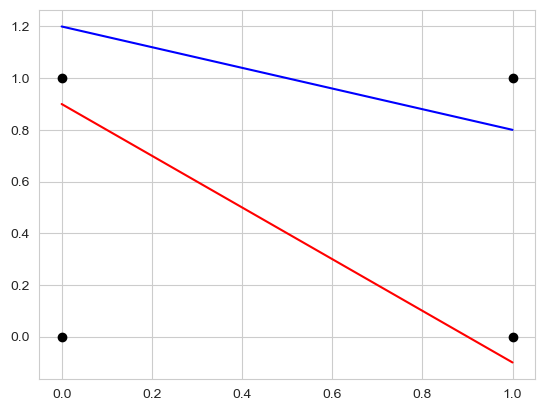

In [4]:
# We are going to plot an example of the hyperplanes for both gates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots()  # Creates a figure containing a single axes.
#plt.xlim(-0.1,1.1) # limits x-axes
#plt.ylim(-0.1,1.1) # limits y-axes
ax.scatter([0,0,1,1],[0,1,0,1],color='black')  # Plots the points on the axes.
x = np.linspace(0, 1, 2) # step size
ax.plot(x, (0-0.9)/(0.9-0) * x + 0.9, color='red') # An example of hyperplane separator for OR gate
ax.plot(x, (0.8-1.2)/(1-0) * x + 1.2, color='blue') # An example of hyperplane separator for AND gate

If your weights are correct, the following should output true:

In [5]:
print(np.all(step_activation(X_and.dot(w_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or)) == Y_or.ravel()))

True
True


Observe that we are already taking advantage of **matrix calculus**: by multiplying above the input matrix with the weight vector we can simultaneously obtain the perceptron's outputs for all patterns. Then we just need to compare whether those outputs are actually the desired ones.

Let us code now **Rosenblatt's perceptron**, so that it learns automatically **w_and** and **w_or** for us, as they are both **linearly separable** problems.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement Rosenblatt's perceptron in a function called **perceptron_learn**. The inputs should be the X and Y matrices for the problem to be solved, and the output should be the **w** vector comprising both the bias and the actual weights.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Rosenblatt's algorithm operates in an **online** way, so you cannot take advantage of matrix calculus, as the weight vector **w** may change with every single pattern.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
For comparison purposes, initialize **w = 0**. The function **zeros** in numpy does exactly this.
 </td></tr>
</table>

In [6]:
def perceptron_learn(X, Y):
    
    # Initialize weights with zeros
    #w = np.zeros(len(X_and[0]))
    
    # Initialize weights to random values
    w = np.random.rand(len(X[0]))
    
    error = True
    
    # Number of rows of matrix X (number of inputs)
    n=len(X)
    epochs = 0                   

    while (error):
        # We have to create an array of errors, so that we can save the result of each input
        err = []
        # For every input
        for i in range(n):
            # Calculate perceptron output w*x[i]
            o = step_activation(w.dot(X[i]))#+b)
            if (o!=Y[i]):
                # Update weights (We do not update biases because they are included in X)
                w = w + (Y[i]-o)*(X[i])
                #b = b + (Y[i] - o)
                err.append(True)
            else:
                err.append(False)
            # We increase the number of epochs. If i < n we continue in the for loop
        epochs+=1
        # We check that there is no True in the array, if there is the w obtained is not correct for all inputs
        # Any returns the logical value True when any of the elements of the array is True:
        error=np.any(err)

        if epochs == 99:
            print('The perceptron is not capable to converge.')
            return None
    
    print("It takes", str(epochs), "epochs to reach convergence.")
        
    return w

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Test your implementation with the AND and OR problems. How many **epochs** are needed for convergence? What values do you get for **w_and** and **w_or**?
 </td></tr>
</table>

In [7]:
w_and_zeros = perceptron_learn(X_and, Y_and)
print("The values for w_and are:\n", w_and_zeros)

w_or_zeros = perceptron_learn(X_or, Y_or)
print("The values for w_or are:\n", w_or_zeros)

It takes 6 epochs to reach convergence.
The values for w_and are:
 [-2.20670759  1.41387194  1.16866553]
It takes 3 epochs to reach convergence.
The values for w_or are:
 [-0.22931094  0.62582698  1.09012223]


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that these new values for **w_and** and **w_or** do solve the respective problems. What happens if you initialize weights differently in **perceptron_learn**?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Although Rosenblatt's algorithm states that all weights should be initialized to 0, you can initialize them randomly and convergence is still guaranteed.
 </td></tr>
</table>

In [8]:
print(np.all(step_activation(X_and.dot(w_and_zeros)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or_zeros)) == Y_or.ravel()))

True
True


In [9]:
w_and_rand = perceptron_learn(X_and, Y_and)
print("The values for w_and are:\n", w_and_rand)

w_or_rand = perceptron_learn(X_or, Y_or)
print("The values for w_or are:\n", w_or_rand)

It takes 6 epochs to reach convergence.
The values for w_and are:
 [-2.74745925  2.01914212  1.67188509]
It takes 4 epochs to reach convergence.
The values for w_or are:
 [-0.98557144  1.7707084   1.09169631]


In [10]:
print(np.all(step_activation(X_and.dot(w_and_rand)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or_rand)) == Y_or.ravel()))

True
True


**Comments**

The algorithm is checked by initializing the weights with values different from 0, reaching convergence although in a different number of epochs, in this case less. Therefore, it is verified that convergence is also achieved in this way.

Let us compare our implementation with that of *scikit-learn*. The class which implements a perceptron is **Perceptron**:

In [11]:
from sklearn.linear_model import Perceptron
Perceptron()

Perceptron()

In order to make things comparable, we need no regularization and not shuffling the patterns in each epoch:

In [12]:
perceptron = Perceptron(alpha = 0.0, shuffle=False, max_iter = 15)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Train the scikit-learn perceptron for the AND and OR problems. Do you obtain the same values for **w_and** and **w_or**? Why/why not?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Make sure that the parameter **n_iter** is at least as large as the number of epochs you obtained before.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Since *scikit-learn* splits weights (**coef_**) from biases (**intercept_**), we do not need to prepend anymore a 1 to the patterns. Be careful when feeding them to the **fit** method. Also, take this into account when checking the perceptron's output and comparing it to the one obtained with your method **perceptron_learn**.
 </td></tr>
</table>

In [13]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # without bias now
X_or = X_and.copy()    # same inputs as for AND

perceptron_and = Perceptron(alpha = 0.0, shuffle=False)
perceptron_or = Perceptron(alpha = 0.0, shuffle=False)

perceptron_and.fit(X_and, Y_and.ravel())
weights_and = perceptron_and.coef_
bias_and = perceptron_and.intercept_
print("AND gate:")
print("Weights and bias:\n", weights_and, bias_and)
and_predict = perceptron_and.predict(X_and)
print("Prediction:\n", and_predict)


perceptron_or.fit(X_or, Y_or.ravel())
weights_or = perceptron_or.coef_
bias_or = perceptron_or.intercept_
print("\nOR gate:")
print("Weights and bias:\n", weights_or, bias_or)
or_predict = perceptron_or.predict(X_or)
print("Prediction:\n", or_predict)

AND gate:
Weights and bias:
 [[3. 2.]] [-4.]
Prediction:
 [0 0 0 1]

OR gate:
Weights and bias:
 [[2. 2.]] [-1.]
Prediction:
 [0 1 1 1]


#### Comments
According to the results obtained after executing the Perceptron, different weights are obtained from those obtained with the function perceptron_learn executed previously.

## The XOR problem

As you know from the theory, Rosenblatt's perceptrons can only solve **linearly separable** problems. The AND and OR problems fall into this category, but the XOR problem does not.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Define the XOR problem in two matrices **X_xor**, **Y_xor** as we did above for the AND and OR problems.
 </td></tr>
</table>

In [14]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])
print(X_xor)
print(Y_xor)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that **perceptron_learn** does not converge when given the XOR problem.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Introduce some control to exit the function after a maximum number of epochs has been reached. Otherwise, execution will go on forever and can stall your PC.
 </td></tr>
</table>

In [15]:
w_xor = perceptron_learn(X_xor, Y_xor)
print(w_xor)

The perceptron is not capable to converge.
None


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that scikit-learn's **Perceptron** does not converge either for the XOR problem.
 </td></tr>
</table>

In [16]:
perceptron_xor = Perceptron(alpha = 0.0, shuffle=False)
perceptron_xor.fit(X_xor, Y_xor.ravel())

weights_xor = perceptron_xor.coef_
bias_xor = perceptron_xor.intercept_
print("XOR gate:")
print("Weights and bias:\n", weights_xor, bias_xor)
xor_predict = perceptron_xor.predict(X_xor)
print("Prediction:\n", xor_predict)

XOR gate:
Weights and bias:
 [[0. 0.]] [0.]
Prediction:
 [0 0 0 0]


#### Comments
With the results obtained above, we can conclude that since everything is 0, it is not capable of convergence.

## Multilayer perceptrons

Because of the limitations perceptrons have, **multilayer perceptrons (MLPs)** are usually the choice when dealing with general problems. Let us use for now the following class for an MLP:

In [17]:
class MLP(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

So that an MLP is initialized with a list specifying the sizes of the different layers. For instance:

In [18]:
sizes = [2, 3, 1]
net = MLP(sizes)

Creates an MLP with 2 input neurons, 3 hidden neurons and 1 output neuron. <u>Note also the convention of the weights: they are created in such a way that *weights[i][j][k]* denotes the weight connecting neuron k of the i-th layer to neuron j of the (i+1)-th layer</u> (assuming that input layer is layer 0, first hidden layer is layer 1, and so on). <u>The same logic applies for biases, so that *biases[i][j]* is the bias of neuron j of the (i+1)-th layer</u>.

In [19]:
print("Number of layers: " + str(net.num_layers))
print("Sizes of layers: " + str(net.sizes))
print("Biases of hidden layer: " + str(net.biases[0]))
print("Biases of output layer: " + str(net.biases[1]))
print("Weights between input and hidden layer: " + str(net.weights[0]))
print("Weights between hidden and output layer: " + str(net.weights[1]))

Number of layers: 3
Sizes of layers: [2, 3, 1]
Biases of hidden layer: [[ 1.90607634]
 [ 0.27883443]
 [-0.75138302]]
Biases of output layer: [[-0.6988642]]
Weights between input and hidden layer: [[-1.96114102  0.21302154]
 [ 0.62289478  0.05740083]
 [ 0.07507279 -1.61921619]]
Weights between hidden and output layer: [[-0.60029522 -1.10251424 -0.52945165]]


Let us assume for simplicity that all **activation functions** in our MLPs are going to be the *step_activation* defined above. Note that its implementation is vectorized, so that it works both for scalars and numpy arrays.

We can now easily program the **forward phase** of the **back-propagation** algorithm, that is, to input a pattern to the network and compute the network's outputs.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement the function **forward_phase(mlp, x)** that, given an MLP and an input vector **x**, computes the MLP's outputs when **x** is fed.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of matrix calculus. Make sure to reshape the input vector to column form, so that the matrix-vector products do not raise errors.
 </td></tr>
</table>

In [20]:
def step_activation(x):
    return 1*(x >= 0) # función escalon

def calculate_activation(z):
    return step_activation(z)

def calculate_input(W,a,b):
    return np.dot(W,a) + b

def forward_phase(mlp, inputs):
    
    n_layers = mlp.num_layers # number of layers in the net
    n_inputs = len(inputs) # number of inputs in the vector of inputs
    outputs = np.zeros((n_inputs,1)) # initialize to zero the vector of outputs
    
    for i, input_ in enumerate(inputs): # manage an input index and the input
        a = np.expand_dims(input_, axis=1) # expands 1 dimension the vector of activations
        #print('The input to the net is:',input_) # to trace the code
        for layer in range(n_layers-1): # The loop must end in the output layer
            W = mlp.weights[layer] # Matrix of weights (3,2) between layer and layer+1
            b = mlp.biases[layer] # Vector of biases (1,3) between layer and layer+1
            z = calculate_input(W,a,b) # Vector of inputs (n_neurons_j,1) to every neuron in layer+1
            a = calculate_activation(z) # Vector of outputs (n_neurons_j,1) to every neuron in layer+1
        outputs[i] = a.flatten().item() # Stores the output for each input
        #print(f'The output of the net is {a}') # to trace the code
    
    return outputs

Since weights in the MLP class are initialized randomly, it is very unlikely that these initial weights actually solve the XOR problem.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Check whether the MLP created above does solve XOR or not.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Again, the MLP class splits weights from biases, so you should not feed to the networks the ones prepended to the patterns.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Because of matrix calculus, the return of **forward_phase** will be in matrix form, when it is actually a scalar since there is only a single output neuron. You may need to flatten return values to compare them to the actual outputs.
 </td></tr>
</table>

In [21]:
X_xor_mlp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = forward_phase(net,X_xor_mlp)
outputs.flatten()

array([0., 0., 0., 0.])

**Comments**

According to the result obtained, it is verified that the XOR gate is not solved with this method.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build an MLP that actually solves XOR.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
You know from the theory that it suffices with a hidden layer of just 2 neurons. Because we have not coded any learning algorithm (we would need to program the whole back-propagation algorithm for that), you will have to set directly its weights and biases so that it does the job.
 </td></tr>
</table>

In [22]:
class MLP_XOR(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = np.array([[[-0.5],[-0.5]],[[-0.5]]], dtype=object) # Slide #213
        self.weights = np.array([[[1, -1],[-1, 1]],[[1, 1]]], dtype=object) # Slide #213

In [23]:
net_xor = MLP_XOR(sizes)
outputs_xor = forward_phase(net_xor,X_xor_mlp)
outputs_xor.flatten()

array([0., 1., 1., 0.])

Coding oneself the back-propagation algorithm is tedious and prone to errors (especially the **backward phase**), so it is only useful as an academic programming exercise. In practice, one resorts to implementations already available. *Scikit-learn* has two classes for MLPs, the **MLPClassifier** and the **MLPRegressor**:

In [24]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
print(MLPClassifier())
print(MLPRegressor())

MLPClassifier()
MLPRegressor()


The only differences between the two are the **loss function** (**cross-entropy** for classification, **MSE** for regression) and the activation function of the output layer (**sigmoid** for classification, **identity** for regression). As you can see, the parameters used in construction are exactly the same ones, as well as the default values.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Discuss which of the above parameters you can identify with those seen in the theory slides and which you cannot.
 </td></tr>
</table>

#### Comments
From the theory slides we can identify, Indentity and Sigmoid for the activation function, and also MSE for the loss function, but we can not see the cross-entropy loss function for classification.

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Take some classification dataset used in the SVM assignments and fit an *MLPClassifier* by modifying the parameters you deem appropriate. Report the best network configuration you can find. Can you beat the best SVM you obtained for that problem?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Repeat with some regression dataset and an *MLPRegressor*. Are you able to beat the SVR?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Beware of normalizing your data before feeding them to an MLP. It is advised to use a pipeline with a *StandardScaler*.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Once in a pipeline, you can use grid search to try different choices for the MLP parameters.
 </td></tr>
</table>

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>